In [1]:
#readFeats
import numpy as np
import pandas as pd
import sklearn
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import os
from sklearn.utils import shuffle
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score


/home/xuhuang/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
file_list = os.listdir("../nhussain_scripts/InjModShiftVals/")[:10000]
file_list[:5]

['10853667-4_inj_feats.txt',
 '10853667-6_inj_feats.txt',
 '10853667-8_inj_feats.txt',
 '10000198-1_inj_feats.txt',
 '10853667-7_inj_feats.txt']

In [3]:
col_names = ["mod_sig_pri_dv", "mod_sig_sec_dv","mod_sig_ter_dv",
             "mod_sig_pos_dv", "mod_fa1_dv","mod_fa2_dv", "mod_fred_dv",
             "modshiftval1_dv", "modshiftval2_dv", "modshiftval3_dv",
             "modshiftval4_dv", "modshiftval5_dv", "modshiftval6_dv", 
             "white_noise", "red_noise", "BLS_Period_1_0", "BLS_Tc_1_0",
             "BLS_SN_1_0", "BLS_SR_1_0", "BLS_SDE_1_0", "BLS_Depth_1_0",
             "BLS_Qtran_1_0", "BLS_Qingress_1_0", "BLS_OOTmag_1_0",
             "BLS_i1_1_0", "BLS_i2_1_0", "BLS_deltaChi2_1_0", 
             "BLS_fraconenight_1_0", "BLS_Npointsintransit_1_0",
             "BLS_Ntransits_1_0", "BLS_Npointsbeforetransit_1_0", 
             "BLS_Npointsaftertransit_1_0", "BLS_Rednoise_1_0",
             "BLS_Whitenoise_1_0", "BLS_SignaltoPinknoise_1_0"] 

total_data = np.empty(shape=[0, len(col_names)])

for name in file_list:
    data = np.loadtxt("InjModShiftVals/" + name).reshape(1, len(col_names))
    #print data.shape
    total_data = np.append(total_data, data, axis =0)
    #break
total_data.shape


(10000, 35)

In [4]:
total_data_frame = pd.DataFrame(total_data, columns=col_names)

In [26]:
yvals = np.loadtxt("SNR_10000_corrected.txt")[:10000]
true_trans = (yvals>6).astype(int) 
print len(np.where(true_trans==0)[0])
object_label = np.ones_like(yvals)
object_label[true_trans==1] =2 # labeled transits =2, ignored transits = 1
print object_label
print len(np.where(object_label==2)[0])

745
[ 2.  2.  2. ...,  2.  2.  2.]
9255


In [27]:
inv_filenames = os.listdir("../nhussain_scripts/InvModShiftVals/")[:15000]

In [28]:
total_data_inv = np.empty(shape=[0, len(col_names)])
for name in inv_filenames:
    try:
        data = np.loadtxt("InvModShiftVals/" + name).reshape(1, len(col_names))
        total_data_inv = np.append(total_data_inv, data, axis =0)

    except:
        continue
    #print data.shape
    #break
total_data_inv.shape

(15000, 35)

In [29]:
total_data_inv_frame = pd.DataFrame(total_data_inv, columns=col_names)

In [30]:
inv_labels = np.zeros(total_data_inv.shape[0])
inv_labels.fill(3)
print inv_labels.shape, inv_labels[2]
object_label = np.append(object_label, inv_labels)
print object_label.shape # one is a missed transit, 2 is a transit, 3 in an inverted signal

(15000,) 3.0
(25000,)


In [31]:
total_data_frame["Y"] = true_trans
zero_lenght = np.zeros(total_data_inv_frame.shape[0])
total_data_inv_frame["Y"] = zero_lenght
data = pd.concat([total_data_frame, total_data_inv_frame], axis = 0)

print data.index


del data["BLS_Npointsaftertransit_1_0"]
del data["BLS_Npointsintransit_1_0"]
del data["BLS_Npointsbeforetransit_1_0"]
del data["BLS_OOTmag_1_0"]
del data["BLS_Tc_1_0"]

print data.shape
print data["BLS_Ntransits_1_0"].min()
print len(np.where(data["Y"]==1)[0])
print len(np.where(data["Y"]==0)[0])
labels = data["Y"]
del  data["Y"]
print data.shape
print np.where(data ==np.inf)
print np.where(data ==-np.inf)
print np.where(data ==np.nan)
data = data.replace(np.inf, 0)
data = data.replace(-np.inf, 0)
print data.columns.values


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14990, 14991, 14992, 14993, 14994, 14995, 14996, 14997, 14998,
            14999],
           dtype='int64', length=25000)
(25000, 31)
1.0
9255
15745
(25000, 30)
(array([12178, 13731, 14890, 16796, 21441, 21591, 22727]), array([7, 7, 7, 7, 7, 7, 7]))
(array([12178, 13731, 14890, 16796, 21441, 21591, 22727]), array([10, 10, 10, 10, 10, 10, 10]))
(array([], dtype=int64), array([], dtype=int64))
['mod_sig_pri_dv' 'mod_sig_sec_dv' 'mod_sig_ter_dv' 'mod_sig_pos_dv'
 'mod_fa1_dv' 'mod_fa2_dv' 'mod_fred_dv' 'modshiftval1_dv'
 'modshiftval2_dv' 'modshiftval3_dv' 'modshiftval4_dv' 'modshiftval5_dv'
 'modshiftval6_dv' 'white_noise' 'red_noise' 'BLS_Period_1_0' 'BLS_SN_1_0'
 'BLS_SR_1_0' 'BLS_SDE_1_0' 'BLS_Depth_1_0' 'BLS_Qtran_1_0'
 'BLS_Qingress_1_0' 'BLS_i1_1_0' 'BLS_i2_1_0' 'BLS_deltaChi2_1_0'
 'BLS_fraconenight_1_0' 'BLS_Ntransits_1_0' 'BLS_Rednoise_1_0'
 'BLS_Whitenoise_

In [47]:
shuffleX, shuffleY , shuffle_labels= shuffle(data, labels, object_label, random_state =0)
shuffleX = shuffleX.reset_index(drop = True)
shuffleY = shuffleY.reset_index(drop = True)
#print shuffleY.head()
#shuffle_labels = pd.Series(shuffle_labels)
#shuffle_labels = shuffle_labels.reset_index()

print shuffleX.shape, shuffleY.shape #, train_label.shape

trainX, testX, trainY, testY, train_label, test_label = train_test_split(shuffleX, shuffleY, shuffle_labels, stratify =shuffle_labels, test_size = 0.80,random_state = 0 )

#print train_label.shape, test_label.shape
print "Strong Transits in training" , len(np.where([(trainY==1) & (train_label==2)])[0]) 
print "Weak Transits in training" , len(np.where([(trainY==0) & (train_label==1)])[0]) 
print "Inverted Signals in training" , len(np.where([(trainY==0) & (train_label==3)])[0]) , "\n"
print "Strong Transits in testing" , len(np.where([(testY==1) & (test_label==2)])[0]) 
print "Weak Signals in testing" , len(np.where([(testY==0) & (test_label==1)])[0]) 
print "Inverted Signals in testing" , len(np.where([(testY==0) & (test_label==3)])[0]) 

print shuffleX.columns.values

(25000, 30) (25000,)
Strong Transits in training 1851
Weak Transits in training 149
Inverted Signals in training 3000 

Strong Transits in testing 7404
Weak Signals in testing 596
Inverted Signals in testing 12000
['mod_sig_pri_dv' 'mod_sig_sec_dv' 'mod_sig_ter_dv' 'mod_sig_pos_dv'
 'mod_fa1_dv' 'mod_fa2_dv' 'mod_fred_dv' 'modshiftval1_dv'
 'modshiftval2_dv' 'modshiftval3_dv' 'modshiftval4_dv' 'modshiftval5_dv'
 'modshiftval6_dv' 'white_noise' 'red_noise' 'BLS_Period_1_0' 'BLS_SN_1_0'
 'BLS_SR_1_0' 'BLS_SDE_1_0' 'BLS_Depth_1_0' 'BLS_Qtran_1_0'
 'BLS_Qingress_1_0' 'BLS_i1_1_0' 'BLS_i2_1_0' 'BLS_deltaChi2_1_0'
 'BLS_fraconenight_1_0' 'BLS_Ntransits_1_0' 'BLS_Rednoise_1_0'
 'BLS_Whitenoise_1_0' 'BLS_SignaltoPinknoise_1_0']


In [48]:
xgbc = XGBClassifier(n_estimators = 300, seed=8, max_depth = 8, colsample_bytree=0.95, subsample=0.85)
#xgbc.fit(trainX, trainY)

In [49]:
# try cross validation
xgb_params  = xgbc.get_params()
dtrain = xgb.DMatrix(shuffleX, label=shuffleY)
scores = xgb.cv(xgb_params, dtrain, metrics="auc", seed=0 ,nfold=5, stratified=True)
np.mean(scores)

test-auc-mean     0.977087
test-auc-std      0.000872
train-auc-mean    0.982928
train-auc-std     0.000913
dtype: float64

0.962325266974
0.96070152647
[ 0.0754717   0.03741054  0.05774235  0.0396877   0.05465192  0.02212101
  0.0125244   0.06148341  0.02277163  0.00780742  0.00292778  0.04066363
  0.01984385  0.00292778  0.03318152  0.04212752  0.03399479  0.0375732
  0.01984385  0.05074821  0.00195185  0.02667534  0.06408588  0.04538061
  0.04407937  0.00699414  0.04163956  0.00992193  0.02456083  0.01268705
  0.04651919]


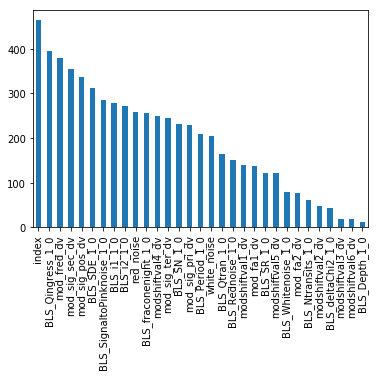

In [42]:
xgbc.fit(trainX, trainY)
preds = xgbc.predict(testX)
print metrics.average_precision_score(testY, preds)
print metrics.f1_score(testY, preds)
preds_p = xgbc.predict_proba(testX)[:,1]
precis, recall, thresholds = metrics.precision_recall_curve(testY, preds_p, ) 
#print metrics.auc(fpr, tpr)

print xgbc.feature_importances_
feat_imp = pd.Series(xgbc.booster().get_fscore()).sort_values(ascending = False)
feat_imp.plot(kind = 'bar')

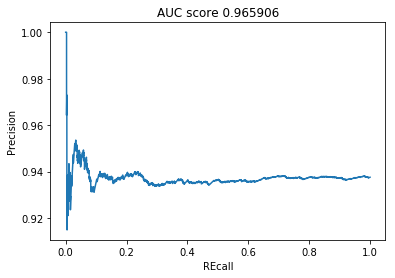

In [16]:
plt.plot( recall, precis)
plt.ylim=([0,1])
plt.xlabel("REcall")
plt.ylabel("Precision")
plt.title("AUC score %f" % metrics.average_precision_score(testY, preds))
plt.show()

In [17]:
import hyperopt
from hyperopt import  hp, fmin, tpe, STATUS_OK, Trials
xgb.__file__

'/home/xuhuang/anaconda2/lib/python2.7/site-packages/xgboost/__init__.pyc'

In [18]:
space ={
        'max_depth': hp.quniform('x_max_depth', 1, 20,1),
        'min_child_weight': hp.quniform ('x_min_child', 1, 20, 1),
        'subsample': hp.uniform ('x_subsample', 0.7, 1),
        'colsample_bytree': hp.uniform ('x_tree_colsample', 0.7,1),
        'learning_rate': hp.uniform ('x_learning_rate', 0.001, 0.1)
}


In [19]:
#implemented with xgb cv

def objective4(space3):

    clf = XGBClassifier(n_estimators = 500, 
                            max_depth = space3['max_depth'], 
                            min_child_weight =space3['min_child_weight'],
                            subsample = space3['subsample'],
                            colsample_bytree =space3['colsample_bytree'],
                            learning_rate = space3['learning_rate'])
    start = time.time()
    cv_result = xgb.cv(clf.get_xgb_params(),dtrain, num_boost_round=50, nfold=5, metrics='auc', early_stopping_rounds=5 )
    end = time.time()
    #score = cross_val_score(clf, trainX, trainY, cv = 5, scoring="average_precision")
    score =  cv_result.iloc[-1]["test-auc-mean"]
    score_std =  cv_result.iloc[-1]["test-auc-std"]
    print ("SCORE %f, in : %f s:" % (score, (end-start)))

    return{'loss':1-score, 'status': STATUS_OK, "cv_score":score, "test_avg": score_std }


In [20]:
trials4= Trials()
import time
start = time.time()
best4 = fmin(fn=objective4, space = space, algo = tpe.suggest, max_evals = 50, trials = trials4)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

SCORE 0.981775, in : 1.996164 s:
SCORE 0.981376, in : 2.615103 s:
SCORE 0.981925, in : 9.442953 s:
SCORE 0.981213, in : 3.471376 s:
SCORE 0.981587, in : 3.395648 s:
SCORE 0.982069, in : 6.098662 s:
SCORE 0.981561, in : 2.179871 s:
SCORE 0.982075, in : 8.805900 s:
SCORE 0.981544, in : 2.033367 s:
SCORE 0.981702, in : 2.772571 s:
SCORE 0.980470, in : 1.217991 s:
SCORE 0.981111, in : 2.141726 s:
SCORE 0.981217, in : 9.081353 s:
SCORE 0.980659, in : 1.452645 s:
SCORE 0.981467, in : 2.124759 s:
SCORE 0.981319, in : 1.801364 s:
SCORE 0.981108, in : 1.810310 s:
SCORE 0.981142, in : 2.908367 s:
SCORE 0.980844, in : 2.787410 s:
SCORE 0.980903, in : 2.637302 s:
SCORE 0.981516, in : 1.610411 s:
SCORE 0.981538, in : 2.727510 s:
SCORE 0.981455, in : 2.318108 s:
SCORE 0.981506, in : 1.503200 s:
SCORE 0.981535, in : 3.170987 s:
SCORE 0.981567, in : 5.918131 s:
SCORE 0.980996, in : 2.332400 s:
SCORE 0.982296, in : 5.488578 s:
SCORE 0.981679, in : 2.290241 s:
SCORE 0.981819, in : 2.147970 s:
SCORE 0.98

In [21]:
print best4
#parameters determined with 10000 injected signals, and 15000 inverted signals
#{'x_min_child': 6.0, 'x_tree_colsample': 0.7354020408903529, 'x_max_depth': 14.0, 'x_subsample': 0.9234005631737567, 'x_learning_rate': 0.0010610314208362149}

{'x_min_child': 13.0, 'x_tree_colsample': 0.7829184980779225, 'x_max_depth': 20.0, 'x_subsample': 0.7849939872988385, 'x_learning_rate': 0.04083576352908885}


In [50]:
#try testing on the holdout set with ALL of the selected parameters
test_best = XGBClassifier(seed = 0, min_child_weight=best4["x_min_child"],
                         max_depth = int(best4["x_max_depth"]),
                         subsample = best4["x_subsample"],
                         colsample_bytree = best4["x_tree_colsample"],
                         learning_rate = best4["x_learning_rate"], 
                         n_estimators = 100)
#print trainX.shape, trainY.shape, testX.shape, testY.shape
test_best.fit(trainX, trainY)
preds = test_best.predict_proba(testX)[:,1]
auc_Score = metrics.roc_auc_score(testY,preds)
print auc_Score
#print metrics.precision_recall_(testY, preds)
print metrics.average_precision_score(testY, preds)
preds = test_best.predict(testX)
print metrics.f1_score(testY, preds)

0.976290790135
0.925281391032
0.961308750974


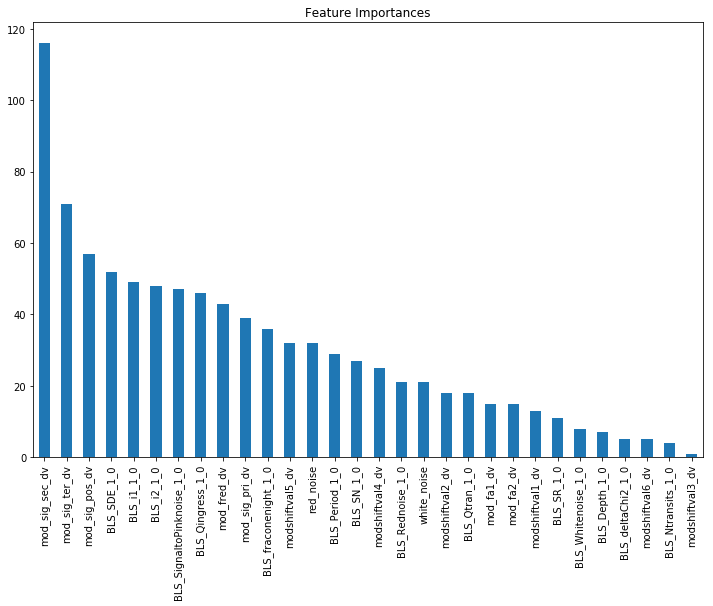

In [61]:
#feautres plot
#test_best= XGBClassifier(seed = 0, n_estimators = 100, min_child = best4["x_min_child"])
feat_impo = pd.Series(test_best.booster().get_fscore()  ).sort_values(ascending = False)# .feature_importances_
sum_vals =  np.sum(feat_impo.values)

feat_impo.plot(kind = "bar", figsize = (12, 8), title = "Feature Importances")

In [ ]:
#drop the last five, since they contribute very little, and see how the performance is
feat_impo_trimmed = feat_impo[:-5].index
print feat_impo_trimmed
reduced_feat = trainX[feat_impo_trimmed]
print reduced_feat.shape

In [ ]:
test_best.fit(reduced_feat, trainY)
reduced_test = testX[feat_impo_trimmed]
preds = test_best.predict(reduced_test)
score = metrics.roc_auc_score(testY, preds)
print score

In [25]:
#try determine  things like false positive rate
false_positives = len(np.where([(preds==1) & (testY==0)])[0])
false_negatives = len(np.where([(preds==0) & (testY==1)])[0])
print false_positives, false_negatives
print "Precision", metrics.precision_score(testY, preds)
print "Recall", metrics.recall_score(testY, preds)
print "ROC" , metrics.roc_auc_score(testY, preds)
#print len(preds)

false_positive_inverted  = len(np.where([(preds==1) & (testY==0) & (test_label==3)])[0])
false_positive_weak_sig  = len(np.where([(preds==1) & (testY==0) & (test_label==1)])[0])
false_negative_strong_sig  = len(np.where([(preds==0) & (testY==1) & (test_label==2)])[0])

#how many weak, and strong signals and inverted in test sample?
print "Inverted", len(np.where([(testY==0) & (test_label==3)])[0])
print "Strong Transit", len(np.where([(testY==1) & (test_label==2)])[0])
print "Weak transit ", len(np.where([(testY==0) & (test_label==1)])[0]) ,"\n"

print "Num of false positive inverted,  and false_negative strong sig, false positive weak sig"
print false_positive_inverted,  false_negative_strong_sig, false_positive_weak_sig


#how many weak, and strong signals and inverted in test sample?
print "Inverted Percent False Positive Rate", float(false_positive_inverted) / len(np.where([(testY==0) & (test_label==3)])[0])
print "Strong Transit False Negative Rate?", float(false_negative_strong_sig) / len(np.where([(testY==1) & (test_label==2)])[0])
print "Weak transit False Positive Rate", float(false_positive_weak_sig) / len(np.where([(testY==0) & (test_label==1)])[0])

618 0
Precision 0.937575757576
Recall 1.0
ROC 0.980023273856
Inverted 14850
Strong Transit 9282
Weak transit  618 

Num of false positive inverted,  and false_negative strong sig, false positive weak sig
0 0 618
Inverted Percent False Positive Rate 0.0
Strong Transit False Negative Rate? 0.0
Weak transit False Positive Rate 1.0
